# Find the flag!


  Can you guess which continent this flag comes from?
  
<img src="https://static-assets.codecademy.com/Paths/machine-learning-engineer-career-path/reunion.png" alt="image">

What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features.

We’ll explore which features are the best to use and the best way to create your decision tree.

#### Datasets

The original data set is available at the UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/Flags

In [1]:
# Import all necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### Investigate the data

Some of the input and output features of interest are:

* name: Name of the country concerned
* landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
* bars: Number of vertical bars in the flag
* stripes: Number of horizontal stripes in the flag
* colours: Number of different colours in the flag
* red: 0 if red absent, 1 if red present in the flag
…

* mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
* circles: Number of circles in the flag
* crosses: Number of (upright) crosses
* saltires: Number of diagonal crosses
* quarters: Number of quartered sections
* sunstars: Number of sun or star symbols
We will build a decision tree classifier to predict what continent a particular flag comes from. Before that, we want to understand the distribution of flags by continent. Calcluate the count of flags by landmass value.

In [2]:
# import data
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

#Print number of countries by landmass, or continent
print(df.landmass.value_counts())

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64


In [3]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Rather than looking at all six continents, we will focus on just two, Europe and Oceania.

In [4]:
# Europe and Oceania dataframe
df_europe_oceania = df[(df.landmass.isin([3,6]))]


Let's print out averages for our predictors (var) for those two continents.

In [5]:
print(df_europe_oceania.groupby('landmass')[var].mean())

               red  green      blue      gold     white     black    orange  \
landmass                                                                      
3         0.828571    0.2  0.514286  0.428571  0.771429  0.171429  0.057143   
6         0.800000    0.2  0.800000  0.600000  0.950000  0.150000  0.150000   

              bars   stripes   circles   crosses  saltires  quarters  \
landmass                                                               
3         0.628571  1.285714  0.028571  0.285714  0.028571  0.028571   
6         0.000000  0.400000  0.150000  0.400000  0.300000  0.400000   

          sunstars  triangle   animate  
landmass                                
3         0.142857  0.028571  0.114286  
6         3.300000  0.250000  0.300000  


We will build a classifier to distinguish flags for these two continents.

In [6]:
#Create labels for only Europe and Oceania
labels = df_europe_oceania.landmass

#Print the variable types for the predictors
print(df_europe_oceania[var].dtypes)

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In order to perform classification all variables should be numeric. Variable *mainhue* is not. Let's transform the dataset first and then split it into train and test data.

In [7]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df_europe_oceania[var])
data.head()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,...,quarters,sunstars,triangle,animate,mainhue_black,mainhue_blue,mainhue_gold,mainhue_green,mainhue_red,mainhue_white
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,1,0,1,1,0,0,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10,1,0,1,0,1,0,0,0,0,0,...,1,6,0,0,0,1,0,0,0,0
11,1,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# Defining predictors and labels
X = data
y = labels
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.4)


#### Tune Decision Tree Classifiers by Depth

We will explore tuning the decision tree model by testing the performance over a range of max_depth values. Will plot chart and will find largest accuracy.

In [9]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth 
acc_depth = []
depths = range(1,21)
for i in depths:
    dt = DecisionTreeClassifier(max_depth = i, random_state=10)
    dt.fit(x_train, y_train)
    acc_depth.append(dt.score(x_test,y_test))
print(acc_depth)
    

[0.6818181818181818, 0.6818181818181818, 0.6363636363636364, 0.6363636363636364, 0.7272727272727273, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454]


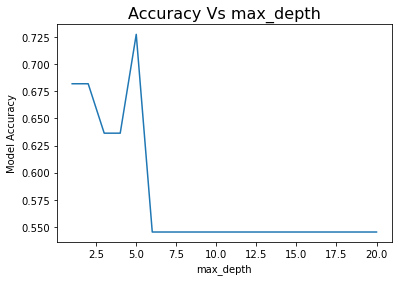

Largest model accuracy is 0.727 at max_depth of 5


<Figure size 432x288 with 0 Axes>

In [10]:
#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('Model Accuracy')
plt.title('Accuracy Vs max_depth', size=16)
plt.show()
plt.clf()

# Largest accuracy
print('Largest model accuracy is {} at max_depth of {}'.format(round(max(acc_depth),3),acc_depth.
                                                               index(max(acc_depth))+1))

# depths = range(1,21)
# max_acc = np.max(acc_depth)
# best_depth = depths[np.argmax(acc_depth)]
# print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Now as we know the best accuracy we can refit model with it and plot tree.

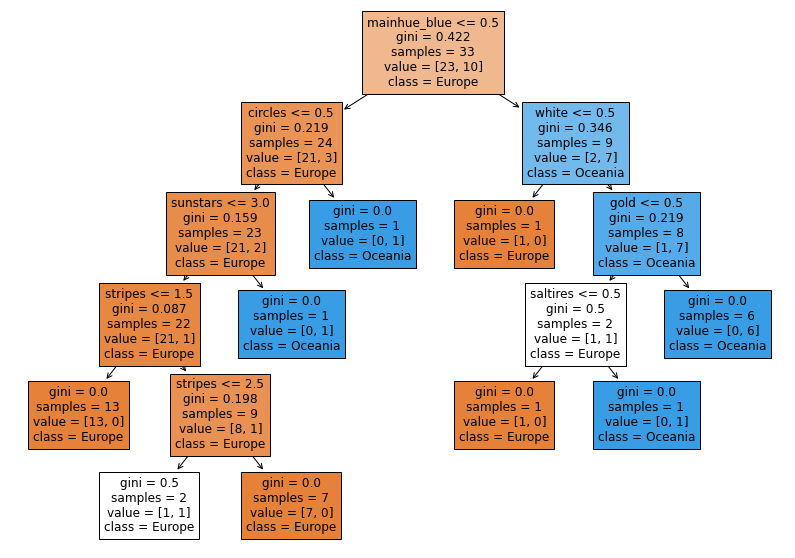

<Figure size 432x288 with 0 Axes>

|--- mainhue_blue <= 0.50
|   |--- circles <= 0.50
|   |   |--- sunstars <= 3.00
|   |   |   |--- stripes <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- stripes >  1.50
|   |   |   |   |--- stripes <= 2.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- stripes >  2.50
|   |   |   |   |   |--- class: 3
|   |   |--- sunstars >  3.00
|   |   |   |--- class: 6
|   |--- circles >  0.50
|   |   |--- class: 6
|--- mainhue_blue >  0.50
|   |--- white <= 0.50
|   |   |--- class: 3
|   |--- white >  0.50
|   |   |--- gold <= 0.50
|   |   |   |--- saltires <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- saltires >  0.50
|   |   |   |   |--- class: 6
|   |   |--- gold >  0.50
|   |   |   |--- class: 6



In [11]:
best_depth = depths[np.argmax(acc_depth)]
#Refit decision tree model with the highest accuracy and plot the decision tree
dt = DecisionTreeClassifier(max_depth=best_depth,random_state=10)
dt.fit(x_train,y_train)
# plot tree
plt.figure(figsize=(14,10))
tree.plot_tree(dt, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], filled=True)
plt.show()
plt.clf()
print(tree.export_text(dt, feature_names = X.columns.tolist()))

#### Tune Decision Tree Classifiers by Pruning

Like we did with *max_depth*, we will now tune the tree by using the hyperparameter *ccp_alpha* (cost_complexity_pruning_path), which is a pruning parameter. 

To get the different applicable alpha values and corresponding impurity in the leaf nodes introduced due to that, we can use the cost_complexity_pruning_path function present in the DecisionTreeClassifier class. 

In [12]:
# Getting alphas
path = dt.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.0137741 , 0.02651515, 0.04124579, 0.05061983,
       0.16903887])

In [13]:
#Create a new list for the accuracy values of a pruned decision tree. 
# Loop through the values of ccp and append the scores to the list
acc_ccp_alpha = []
for i in alphas:
    dt_prune = DecisionTreeClassifier(max_depth = 5, random_state=10, ccp_alpha=i)
    dt_prune.fit(x_train, y_train)
    acc_ccp_alpha.append(dt_prune.score(x_test,y_test))
print(acc_ccp_alpha)

[0.7272727272727273, 0.7272727272727273, 0.7727272727272727, 0.7727272727272727, 0.6818181818181818, 0.5454545454545454]


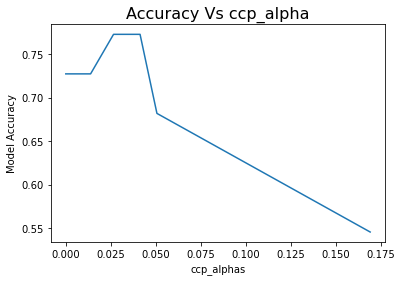

Largest model accuracy is 0.773 at ccp_alpha of 0.0265


<Figure size 432x288 with 0 Axes>

In [14]:
# Plot the accuracy vs ccp_alpha
plt.plot(alphas, acc_ccp_alpha)
plt.xlabel('ccp_alphas')
plt.ylabel('Model Accuracy')
plt.title('Accuracy Vs ccp_alpha', size=16)
plt.show()
plt.clf()

#Find the largest accuracy and the ccp value this occurs
best_ccp = alphas[np.argmax(acc_ccp_alpha)]
print('Largest model accuracy is {} at ccp_alpha of {}'.format(round(max(acc_ccp_alpha),3),round(best_ccp,4)))

#### Final plot with optimized hyperparameters.

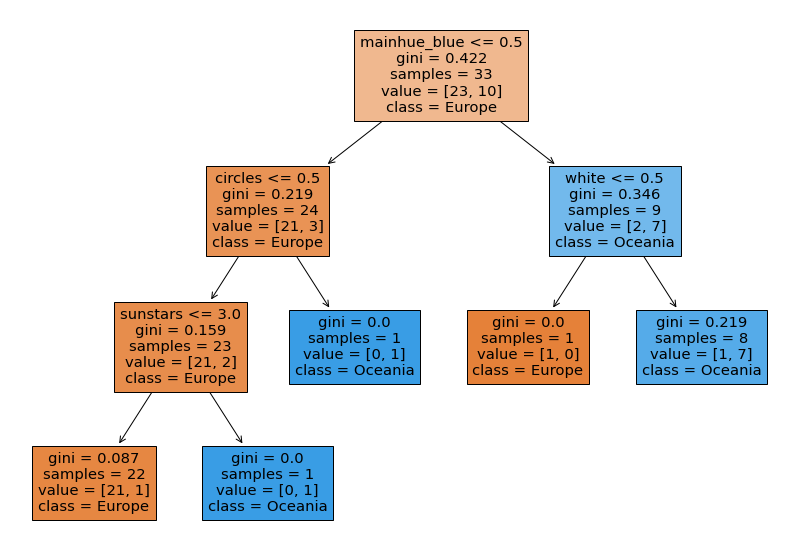

|--- mainhue_blue <= 0.50
|   |--- circles <= 0.50
|   |   |--- sunstars <= 3.00
|   |   |   |--- class: 3
|   |   |--- sunstars >  3.00
|   |   |   |--- class: 6
|   |--- circles >  0.50
|   |   |--- class: 6
|--- mainhue_blue >  0.50
|   |--- white <= 0.50
|   |   |--- class: 3
|   |--- white >  0.50
|   |   |--- class: 6



<Figure size 432x288 with 0 Axes>

In [18]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_opt = DecisionTreeClassifier(max_depth=best_depth,random_state=10, ccp_alpha = best_ccp)
dt_opt.fit(x_train,y_train)

# plot tree
plt.figure(figsize=(14,10))
tree.plot_tree(dt_opt, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], 
               filled=True)
plt.show()
plt.clf()
print(tree.export_text(dt_opt, feature_names = X.columns.tolist()))

#### Conclusion
The accuracy of our final model increased from 0.727 to 0.773 and the structure of the tree became simpler – many unnecessary branches were removed in the pruning process making for a much easier interpretation.